Project Type: Data Cleaning and Tiding
Dataset Source: https://www.gapminder.org
Coding Language: Python
Notebook: Jupyter notebook

The aim of the project is to clean and tide the Gapminder dataset. The final output is the dataset that is ready to be loaded for analysis. Dataset consists of life expectancy by country and year. The data comes in multiple parts and I loaded the data, did preliminary quality diagnosis on the data (by assert statements) and cleaned data using techniques like melting, pivoting and regular_expression string matching etc. I also used visualization techniques to get some interesting insights in the dataset.

In [53]:
import pandas as pd
import re

In [2]:
df = pd.read_csv('https://assets.datacamp.com/production/course_2023/datasets/gapminder.csv')

In [3]:
df.head()

,Unnamed: 0,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Life expectancy
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia
1,1,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Akrotiri and Dhekelia
3,3,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Albania
4,4,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Algeria


From the above step we can understand that:
    1. There are many missing values (NaN). 
    2. Each year is a column from 1800 to 2016
    

In [4]:
df.info() #memory, column types, 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Columns: 219 entries, Unnamed: 0 to Life expectancy
dtypes: float64(217), int64(1), object(1)
memory usage: 1.3+ MB


In [7]:
df.columns

Index([u'Unnamed: 0', u'1800', u'1801', u'1802', u'1803', u'1804', u'1805',
       u'1806', u'1807', u'1808',
       ...
       u'2008', u'2009', u'2010', u'2011', u'2012', u'2013', u'2014', u'2015',
       u'2016', u'Life expectancy'],
      dtype='object', length=219)

In [6]:
df.describe() #statistics

,Unnamed: 0,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,780.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.00000,208.000000
mean,129.500000,31.486020,31.448905,31.463483,31.377413,31.446318,31.562537,31.615970,31.573134,31.376766,...,70.139712,70.447163,70.767740,70.969904,71.324375,71.663077,71.916106,72.088125,72.32101,72.556635
std,75.103138,3.763585,3.755739,3.878204,3.901966,3.877156,3.947957,4.039261,3.917339,4.017228,...,8.953255,8.800452,8.610341,8.898859,8.376540,8.217466,8.120852,8.074990,7.90202,7.738535
min,0.000000,23.390000,23.390000,23.390000,19.600000,23.390000,23.390000,23.390000,23.390000,12.480000,...,43.300000,44.500000,45.500000,32.200000,46.700000,46.100000,45.600000,45.400000,47.10000,48.860000
25%,64.750000,29.000000,28.950000,28.900000,28.900000,28.950000,29.000000,29.000000,29.000000,28.950000,...,64.825000,64.875000,65.225000,65.475000,65.600000,66.075000,66.475000,66.775000,67.05000,67.175000
50%,129.500000,31.800000,31.700000,31.600000,31.500000,31.600000,31.700000,31.800000,31.800000,31.600000,...,72.750000,73.000000,73.350000,73.700000,73.750000,74.050000,74.150000,74.300000,74.40000,74.500000
75%,194.250000,33.900000,33.900000,33.900000,33.800000,33.870000,33.900000,34.000000,34.000000,33.870000,...,76.925000,77.150000,77.425000,77.650000,77.825000,78.125000,78.300000,78.400000,78.50000,78.650000
max,259.000000,42.850000,40.300000,44.370000,44.840000,42.830000,44.270000,45.820000,43.560000,43.550000,...,84.500000,84.600000,84.600000,84.700000,84.700000,84.700000,84.800000,84.800000,84.80000,84.800000


In [15]:
df.value_counts() #to get outliers

AttributeError: 'DataFrame' object has no attribute 'value_counts'

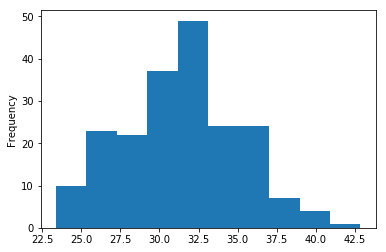

In [21]:
df['1800'].plot('hist')

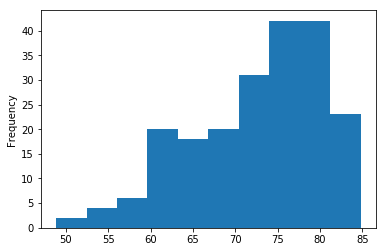

In [22]:
df['2016'].plot('hist')

In [ ]:
#checking data quality

def cleaning_function(row_wise_data):
    #data cleaning steps
    return
    

In [ ]:
df.apply(cleaning_function, axis = 1) #row_wise

In [ ]:
assert (df.column_data > 0).all()

In [ ]:
#for combining data can use this before cleaning

pd.merge(df1,df2,...)
pd.concat([df1,df2,...])

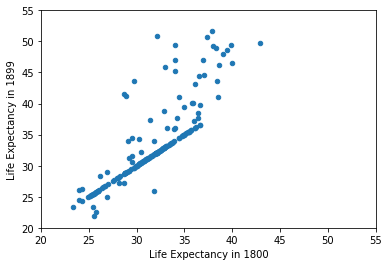

In [23]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Create the scatter plot
df.plot(kind='scatter', x='1800', y='1899')

# Specify axis labels
plt.xlabel('Life Expectancy in 1800')
plt.ylabel('Life Expectancy in 1899')

# Specify axis limits
plt.xlim(20, 55)
plt.ylim(20, 55)

# Display the plot
plt.show()

#As you can see, there are a surprising number of countries that fall on the diagonal line. In fact, examining the DataFrame reveals that the life expectancy for 140 of the 260 countries did not change at all in the 19th century! This is possibly a result of not having access to the data for all the years back then. In this way, visualizing your data can help you uncover insights as well as diagnose it for errors.

Thinking about the question at hand
Since you are given life expectancy level data by country and year, you could ask questions about how much the average life expectancy changes over each year.

Before continuing, however, it's important to make sure that the following assumptions about the data are true:

'Life expectancy' is the first column (index 0) of the DataFrame.
The other columns contain either null or numeric values.
The numeric values are all greater than or equal to 0.
There is only one instance of each country.
You can write a function that you can apply over the entire DataFrame to verify some of these assumptions. Note that spending the time to write such a script will help you when working with other datasets as well.


In [12]:
def check_null_or_valid(row_data):
    """Function that takes a row of data,
    drops all missing values,
    and checks if all remaining values are greater than or equal to 0
    """
    no_na = row_data.dropna()[1:-1]
    numeric = pd.to_numeric(no_na)
    ge0 = numeric >= 0
    return ge0

# Check whether the first column is 'Life expectancy'
assert df.columns[0] == 'Life expectancy'

# Check whether the values in the row are valid
assert df.iloc[:, 1:].apply(check_null_or_valid, axis=1).all().all()

# Check that there is only one instance of each country
assert df['Life expectancy'].value_counts()[0] == 1


AssertionError: 

In [51]:
# Melt gapminder: gapminder_melt
gapminder_melt = pd.melt(df, id_vars = 'Life expectancy')

# Rename the columns
gapminder_melt.columns = ['country', 'year',  'life_expectancy']

# Print the head of gapminder_melt
#print(gapminder_melt.head())
temp = (gapminder_melt['year'] == 'Unnamed: 0')
count = 0
for item in temp:

    if item == True:
        count += 1

print count # count of Unnamed: 0 entries


780


In the above dataset, year is not an integer or a float point. We have 780 'Unnamed: 0' entries in year column. We cannot directly cannot use pd.to_numeric method as the year is not just number but has 'unnamed: ' string in it. 

We need to fill the 'Unnamed: 0' with an integer to convert the column into integer or float. Let us extract 0 from the string and keep year 0 as unnamed year.

To extract the 0 we need to use string manipulations.



In [59]:
gapminder_melt['year'] = gapminder_melt['year'].apply(lambda x : x.replace('Unnamed: ',''))
print gapminder_melt.head()

                 country year  life_expectancy
0               Abkhazia    0              0.0
1            Afghanistan    0              1.0
2  Akrotiri and Dhekelia    0              2.0
3                Albania    0              3.0
4                Algeria    0              4.0


In [60]:
# Convert the year column to numeric
gapminder_melt.year = pd.to_numeric(gapminder_melt.year)
"""
# Test if country is of type object
assert df.country.dtypes == np.object

# Test if year is of type int64
assert df.year.dtypes == np.int64

# Test if life_expectancy is of type float64
assert df.life_expectancy.dtypes == np.float64
"""

'\n# Test if country is of type object\nassert df.country.dtypes == np.object\n\n# Test if year is of type int64\nassert df.year.dtypes == np.int64\n\n# Test if life_expectancy is of type float64\nassert df.life_expectancy.dtypes == np.float64\n'

In [62]:


# Create the series of countries: countries
countries = gapminder_melt['country']

# Drop all the duplicates from countries
countries = countries.drop_duplicates()

# Write the regular expression: pattern
pattern = '^[A-Za-z\.\s]*$'

# Create the Boolean vector: mask
mask = countries.str.contains(pattern)

# Invert the mask: mask_inverse
mask_inverse = ~mask

# Subset countries using mask_inverse: invalid_countries
invalid_countries = countries.loc[mask_inverse]

# Print invalid_countries
print(invalid_countries)


49            Congo, Dem. Rep.
50                 Congo, Rep.
53               Cote d'Ivoire
73      Falkland Is (Malvinas)
93               Guinea-Bissau
98            Hong Kong, China
118    United Korea (former)\n
131               Macao, China
132             Macedonia, FYR
145      Micronesia, Fed. Sts.
161            Ngorno-Karabakh
187             St. Barthélemy
193     St.-Pierre-et-Miquelon
225                Timor-Leste
251      Virgin Islands (U.S.)
252       North Yemen (former)
253       South Yemen (former)
258                      Åland
Name: country, dtype: object


After dropping the missing values from 'life_expectancy', the number of rows in the DataFrame has gone down from 169260 to 43857. In general, you should avoid dropping too much of your data, but if there is no reasonable way to fill in or impute missing values, then dropping the missing data may be the best solution.

In [63]:
# Assert that country does not contain any missing values
assert pd.notnull(gapminder_melt.country).all()

# Assert that year does not contain any missing values
assert pd.notnull(gapminder_melt.year).all()

# Drop the missing values
gapminder_melt = gapminder_melt.dropna(how='any')

# Print the shape of gapminder
print(gapminder_melt.shape)


(44637, 3)


year
0       129.500000
1800     31.486020
1801     31.448905
1802     31.463483
1803     31.377413
Name: life_expectancy, dtype: float64
year
2012    71.663077
2013    71.916106
2014    72.088125
2015    72.321010
2016    72.556635
Name: life_expectancy, dtype: float64


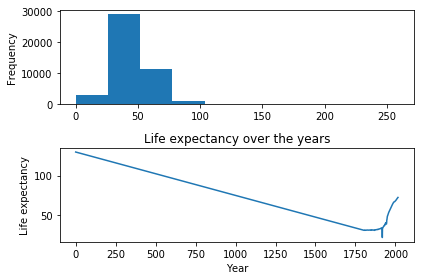

In [65]:
# Add first subplot
plt.subplot(2, 1, 1) 

# Create a histogram of life_expectancy
gapminder_melt.life_expectancy.plot(kind='hist')

# Group gapminder: gapminder_agg
gapminder_agg = gapminder_melt.groupby('year')['life_expectancy'].mean()

# Print the head of gapminder_agg
print(gapminder_agg.head())

# Print the tail of gapminder_agg
print(gapminder_agg.tail())

# Add second subplot
plt.subplot(2, 1, 2)

# Create a line plot of life expectancy per year
gapminder_agg.plot()

# Add title and specify axis labels
plt.title('Life expectancy over the years')
plt.ylabel('Life expectancy')
plt.xlabel('Year')

# Display the plots
plt.tight_layout()
plt.show()

# Save both DataFrames to csv files
gapminder_melt.to_csv('gapminder.csv')
gapminder_agg.to_csv('gapminder_agg.csv')
